### Step 3: Data Visualization

To explore patterns across Geneva’s Airbnb landscape, we created five distinct visualizations—each designed to highlight a different aspect of the dataset. A bar plot of average prices by neighborhood revealed striking regional differences, with Bellevue and Cologny emerging as premium-priced areas. A boxplot comparing room types confirmed expected trends, such as entire homes commanding higher prices and shared rooms remaining the most affordable. To explore listing capacity, we used a strip plot focused on the top five neighborhoods, which showed that Commune de Genève consistently offered the widest range of guest accommodations.

We then used a line plot to examine average review scores across neighborhoods. Several lesser-known areas like Collex-Bossy and Puplinge had perfect scores, suggesting strong guest satisfaction despite having fewer listings. Finally, a correlation heatmap helped us identify key relationships between numerical variables—most notably strong correlations among space-related variables like `beds`, `bedrooms`, and `accommodates`, and minimal correlation between price and guest satisfaction. Together, these visualizations gave us a well-rounded understanding of how pricing, location, room type, and listing characteristics vary across Geneva, offering valuable insight to guide our modeling choices in the next phases.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

df_clean = pd.read_csv('../data/airbnb_cleaned.csv')
df_clean['price'] = df_clean['price'].replace(r'[\$,]', '', regex=True).astype(float)

<Figure size 1200x600 with 0 Axes>

In [2]:
# Drop rows without latitude or longitude
df_map = df_clean.dropna(subset=['latitude', 'longitude'])

import plotly.express as px

fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    color="price",
    hover_name="neighbourhood_cleansed",
    hover_data=["name", "room_type", "accommodates", "price"],
    zoom=12,
    height=600,
    color_continuous_scale="Viridis"
)

fig.update_layout(
    mapbox_style="carto-positron",
    title="Airbnb Listings Across Geneva",
    margin={"r":0, "t":40, "l":0, "b":0}
)

fig.show()


/var/folders/5_/7850fm454vb567dm0m8jx2d80000gn/T/ipykernel_4071/2261040964.py:6: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


### Analysis on the Map of Geneva:
Plotting the Airbnb listings across Geneva instantly highlights the pulse of the city’s rental activity. The densest cluster of listings appears in the heart of the city—particularly around the lakefront, Old Town, and major transport hubs. This central zone is clearly a hotspot for short-term rentals, likely due to its proximity to iconic landmarks, high walkability, and access to restaurants, museums, and public transit. The high demand in this area aligns with the broader urban pattern of Geneva, where both tourists and business travelers prioritize convenience and vibrancy.

What also stood out was the contrast between central and peripheral neighborhoods. While areas like Vernier, Meyrin, and Chêne-Bougeries do host several listings, their distribution is far more dispersed. The color gradient on the map—indicating price—shows that higher-priced properties tend to cluster in quieter, upscale residential zones near the lake, such as Cologny and Bellevue. This suggests a market split: a bustling, moderately priced core catering to volume, and a more exclusive ring offering privacy and premium experiences. Overall, the map gave us a strong visual foundation to understand how location, price, and density interact across Geneva’s Airbnb ecosystem.


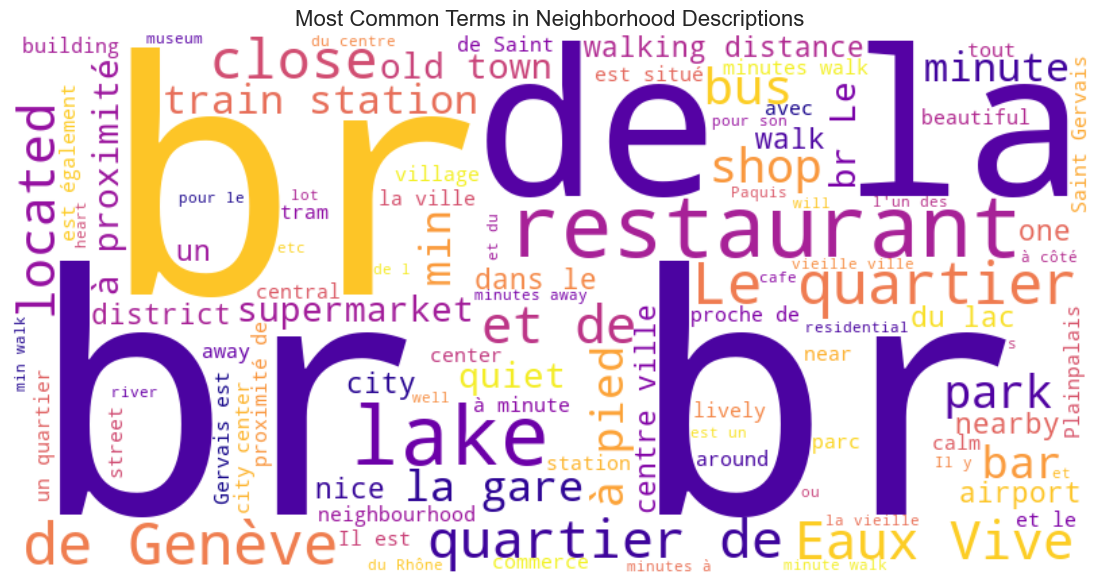

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Drop missing values
text_data = df_clean['neighborhood_overview'].dropna()


# Join all overviews into one big string
full_text = " ".join(text_data.astype(str).tolist())

# Add custom stopwords
stopwords = set(STOPWORDS)
stopwords.update(["Geneva", "location", "area", "apartment", "flat", "place", "neighborhood"])  # common, uninformative words

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    colormap='plasma'
).generate(full_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Terms in Neighborhood Descriptions", fontsize=16)
plt.tight_layout()
plt.show()

### Neighborhood Word Cloud

To better understand how hosts describe their neighborhoods, we generated a word cloud using the `neighbourhood_overview` column. The result reflects Geneva’s bilingual identity, with a rich mix of English and French descriptors. Prominent English terms such as **“lake,” “old town,” “train station,” “quiet,”** and **“walk”** suggest that hosts commonly emphasize scenic beauty, historic charm, ease of transport, and peaceful surroundings. These are qualities likely to resonate with both leisure and business travelers.

French phrases like **“quartier” (neighborhood), “à pied” (on foot), “proche de” (close to), “à proximité” (nearby), “gare” (station),** and **“centre ville” (city center)** also stood out, reinforcing the focus on accessibility and location. Mentions of popular districts such as **Eaux-Vives**, **Plainpalais**, and **Paquis** indicate that hosts often highlight well-known areas to increase visibility and appeal. Overall, the word cloud reveals a pattern: hosts lean into Geneva’s walkability, connectedness, and calm residential vibe to market their listings.